[Reference](http://neuralnetworksanddeeplearning.com/)

- Neural networks, a beautiful biologically-inspired programming paradigm which enables a computer to learn from observational data
- Deep learning, a powerful set of techniques for learning in neural networks 

### An example:

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3I7goOlpVqv9_FZ_k6w4V0c56SCziU8klbsBBgh2TTL7eg3u9)

### Let's take a very closer look and brain:

![](https://d3i71xaburhd42.cloudfront.net/4807bf70ab59417a295d92c54954832577812bfe/4-Figure1-1.png)

### Perceptrons

\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}

### Now we can make a neural network:

![](http://neuralnetworksanddeeplearning.com/images/tikz1.png)

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\tag{2}\end{eqnarray}

In [2]:
%matplotlib inline
import numpy as np
import pylab as plt

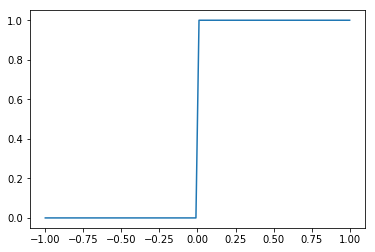

In [3]:
z = np.linspace(-1,1,100)
plt.plot(z,np.heaviside(z,0))

### Activation function needs to be differentiable!

![](http://neuralnetworksanddeeplearning.com/images/tikz8.png)

$$\mathcal{A}(w \cdot x+b)$$

\begin{eqnarray} 
  \frac{1}{1+\exp(-\sum_j w_j x_j-b)}.
\tag{4}\end{eqnarray}

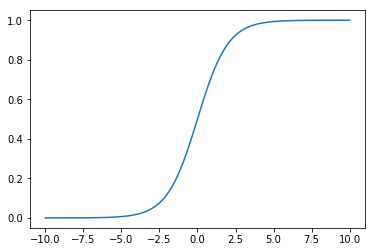

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-10,10,100)
plt.plot(z,sigmoid(z))

### Multilayer perceptrons or MLPs

![](http://neuralnetworksanddeeplearning.com/images/tikz11.png)

### The arrows show the NN is feedforward.

### Going back to the numbers problem ([MNIST](http://yann.lecun.com/exdb/mnist/))

In [26]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


3


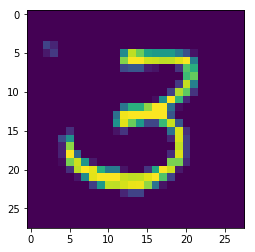

In [28]:
ii = np.random.randint(x_train.shape[0])

plt.imshow(x_train[ii])
print(y_train[ii])

![](http://neuralnetworksanddeeplearning.com/images/tikz12.png)

In [ ]:
x_train = x_train.reshape(-1,28*28)
y_train = np.array([vectorized_result(y) for y in y_train]).reshape(-1,10)
x_test = x_test.reshape(-1,28*28)
y_test = np.array([vectorized_result(y) for y in y_test]).reshape(-1,10)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(30, activation='relu', input_dim=28*28))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 1s 14us/step - loss: 10.6196 - acc: 0.3390
Epoch 2/20
60000/60000 [==============================] - 1s 13us/step - loss: 8.8248 - acc: 0.4513
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 8.7005 - acc: 0.4593
Epoch 4/20
60000/60000 [==============================] - 1s 13us/step - loss: 8.1815 - acc: 0.4906
Epoch 5/20
60000/60000 [==============================] - 1s 13us/step - loss: 7.6433 - acc: 0.5248
Epoch 6/20
60000/60000 [==============================] - 1s 12us/step - loss: 7.6144 - acc: 0.5266
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 7.4876 - acc: 0.5346
Epoch 8/20
60000/60000 [==============================] - 1s 13us/step - loss: 6.2891 - acc: 0.6088
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 6.3406 - acc: 0.6058
Epoch 10/20
60000/60000 [==============================] - 1s 14us/step - loss: 6.1036 - acc: 0.620